In [153]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc

In [154]:


class Hartmann:
    
    def __init__(self,
                 Ha:     float, grad_p: float,
                 eta:    float, sigma:  float,
                 l:      float,
                 steps_count=10000):
        self.Ha  = Ha
        self.eta = eta
        
        self.sigma  = sigma
        self.grad_p = grad_p
        
        self.l = l
        
        self.z = np.linspace(-l, l, steps_count)
        
        return

    def changeHa(self, Ha: float):
        self.Ha = Ha
        return
    
    def getV0(self):
        v0  = -self.l**2 * self.grad_p / self.eta
        v0 *= np.cosh(self.Ha - 1)
        v0 /= self.Ha * np.sinh(self.Ha)
        
        return v0
    
    def getH(self):
        return self.Ha * scc.c / self.l * np.sqrt(self.eta / self.sigma)
    
    def getZ(self):
        return np.copy(self.z)
    
    def calculateVZ(self):
        vz =  -self.l**2 * self.grad_p / self.eta
        vz *= np.cosh(self.Ha) - np.cosh(self.Ha * self.z / self.l)
        vz /= self.Ha * np.sinh(self.Ha)
        
        return vz
    
    def calculate_hZ(self):
        
        hz =  -4 * np.pi / scc.c * self.l**2 * self.grad_p / self.eta
        hz *= np.sqrt(self.sigma * self.eta)
        hz *= np.sinh(self.Ha * self.z / self.l) - self.z / self.l * np.sinh(self.Ha)
        hz /= self.Ha * np.sinh(self.Ha)
    
        return hz
    
    def calculateJz(self):
        
        jz  = -self.l**2 * self.grad_p / self.eta
        jz *= np.sqrt(self.sigma * self.eta)
        jz /= self.Ha * np.sinh(self.Ha)
        jz *= (self.Ha / self.l * np.cosh(self.Ha * self.z / self.l) - np.sinh(self.Ha) / self.l)
        
        return jz

In [155]:
hrt = Hartmann(0.1, -10., 1., 1., 10.)

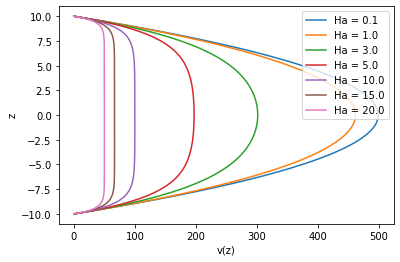

In [156]:

Ha = [0.1, 1., 3., 5., 10., 15., 20.]

for ha in Ha:    
    hrt.changeHa(float(ha))
    vz = hrt.calculateVZ()
    z  = hrt.getZ()
    
    plt.plot(vz, z, label=f'Ha = {ha}')
plt.xlabel('v(z)')
plt.ylabel('z')
plt.legend()
plt.show()

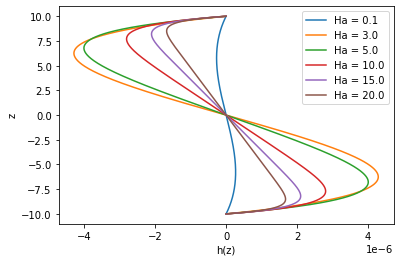

In [157]:

Ha = [0.1, 3., 5., 10., 15., 20.]

for ha in Ha:    
    hrt.changeHa(float(ha))
    hz = hrt.calculate_hZ()
    z  = hrt.getZ()
    
    plt.plot(hz, z, label=f'Ha = {ha}')
plt.xlabel('h(z)')
plt.ylabel('z')
plt.legend()
plt.show()

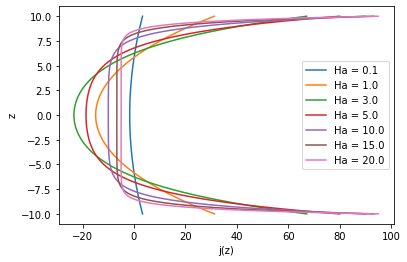

In [158]:

Ha = [0.1, 1., 3., 5., 10., 15., 20.]

for ha in Ha:    
    hrt.changeHa(float(ha))
    jz = hrt.calculateJz()
    z  = hrt.getZ()
    
    plt.plot(jz, z, label=f'Ha = {ha}')
plt.xlabel('j(z)')
plt.ylabel('z')
plt.legend()
plt.show()